### Fig2(a)：超导Tc分布——直方图&核密度

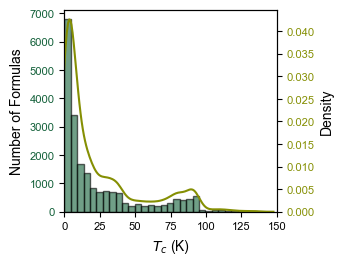

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

color2 = '#858F03'   #density
color1 = '#115F38'   #histogram
# 读取数据
file_path = '../Data/mdr_clean.csv'
df = pd.read_csv(file_path)

# 处理数据，替换无穷大值为NaN，并删除NaN值
data = df['Tc'].replace([np.inf, -np.inf], np.nan).dropna().tolist()

# 创建图表
fig_height = 7  #cm
fig_width = 9 #cm
fig, ax1 = plt.subplots(figsize=(fig_width/2.54, fig_height/2.54))
plt.rcParams['font.family'] = 'Arial'  # 例如，设置为 Arial 字体
# 绘制直方图
ax1.hist(data, bins=30, color=color1, alpha=0.6, edgecolor='black')
ax1.set_xlabel(r'$\mathit{T}_{\mathit{c}}$ (K)', fontsize=10)
ax1.set_ylabel('Number of Formulas', color='black', size=10)
ax1.tick_params(axis='y', labelcolor=color1, labelsize=8)

# 创建第二个轴，共享同一个X轴
ax2 = ax1.twinx()

# 绘制KDE
sns.kdeplot(data, ax=ax2, color=color2, fill=False)
ax2.set_ylabel('Density', color='black', size=10)
ax2.tick_params(axis='y', labelcolor=color2, labelsize=8)

# 设置X轴参数
ax1.tick_params(axis='x', labelsize=8)
ax1.set_xlim(0, 150)

# 保存和显示图表
plt.tight_layout()
plt.savefig('./Pic/Fig2a_a4.svg', bbox_inches='tight',transparent=True)
plt.savefig('./Pic/Fig2a_a4.tif', dpi=600, bbox_inches='tight',transparent=True)
plt.show()

###  Fig2(b): 超导分子式元素数量分布

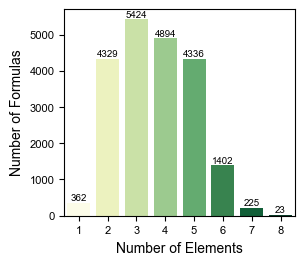

Formulas with 8 elements:
2130            Bi0.6Pb0.2S0.2Sr2Ca0.7Nd0.3Cu2O6.95
2879            Bi0.2Pb0.4S0.4Sr2Ca0.7Nd0.3Cu2O6.99
3082         Ca5.9Sr3.5Bi0.3Y0.1Pb0.1Al0.1Cu15.1O29
3093            Bi0.8Pb0.1S0.1Sr2Ca0.7Nd0.3Cu2O6.95
3094          Bi0.5Pb0.25S0.25Sr2Ca0.7Nd0.3Cu2O6.97
3280     La2.3Gd0.7Ca1Ba2.8Sr0.2Cu6.86In0.14O16.536
4255           Bi1.7Pb0.3Sr2Ca0.7Y0.3Cu1.94Zn0.06O8
4328      La2.1Gd0.9Ca1Ba2.6Sr0.4Cu6.72In0.28O16.54
4451         Bi1.7Pb0.3Sr2Ca0.65Y0.35Cu1.94Zn0.06O8
4526         Bi1.7Pb0.3Sr2Ca0.75Y0.25Cu1.94Zn0.06O8
5460     La1.9Gd1.1Ca1Ba2.4Sr0.6Cu6.58In0.42O16.554
5624           Bi1.7Pb0.3Sr2Ca0.8Y0.2Cu1.94Zn0.06O8
5667           Bi1.7Pb0.3Sr2Ca0.6Y0.4Cu1.94Zn0.06O8
6766             Pb0.5Cd0.5Sr1.5Ba0.5Ca0.5Y0.5Cu2O7
7185         Bi1.7Pb0.3Sr2Ca0.55Y0.45Cu1.94Zn0.06O8
9010             Pb0.5Cd0.5Sr1.6Ba0.4Ca0.5Y0.5Cu2O7
9944       La1.7Gd1.3Ca1Ba2.2Sr0.8Cu6.44In0.56O16.6
16350             Tl0.6Pb0.2Bi0.2Sr1.8Ba0.2Ca2Cu3O9
16675                Bi0.8Nd0.1Tb0.1Pb

In [3]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

# 读取Excel文件的指定列
file_path = '../Data/mdr_clean.csv'
column = 'formula'

# 使用pandas读取Excel文件的指定列
df = pd.read_csv(file_path)

# 定义一个函数来计算分子式中元素的数量
def count_elements(formula):
    # 使用正则表达式匹配所有元素，考虑到元素后面可能紧跟数字
    elements = re.findall(r'[A-Z][a-z]*', formula)
    return len(elements)

# 应用函数并创建一个新的列来存储每个分子式的元素数量
df['element_count'] = df[column].apply(lambda x: count_elements(str(x)) if pd.notnull(x) else 0)

# 统计不同元素数量的分子式数量
element_counts = df['element_count'].value_counts()

# 绘制图表表现数据的分布
fig_height = 7  #cm
fig_width = 8 #cm
plt.rcParams['font.family'] = 'Arial'  # 例如，设置为 Arial 字体
plt.figure(figsize=(fig_width/2.54, fig_height/2.54))
barplot = sns.barplot(x=element_counts.index, y=element_counts.values, hue=element_counts.index, palette="YlGn", legend=False)
# 添加文本注释
for i, (element_count, value) in enumerate(element_counts.items()):
    plt.text(element_count-1,value, str(value), ha='center', va='bottom',fontsize=7)

plt.xlabel('Number of Elements', fontsize=10)
plt.ylabel('Number of Formulas', fontsize=10)
plt.xticks(fontsize=8)  # 确保所有的x轴标签都能显示
plt.yticks(fontsize=8)  # 设置y轴标签的字体大小
# 保存和显示图表
plt.tight_layout()
plt.savefig('./Pic/Fig2b_a4.svg',bbox_inches='tight',transparent=True)
plt.savefig('./Pic/Fig2b_a4.tif', dpi=600,bbox_inches='tight',transparent=True)
plt.show()

# 筛选出元素数量等于一定数量的行
formulas_with_ten_elements = df[df['element_count'] == 8][column]

# 输出这些分子式
print("Formulas with 8 elements:")
print(formulas_with_ten_elements)

### Fig2(c):超导分子式元素出现拼数

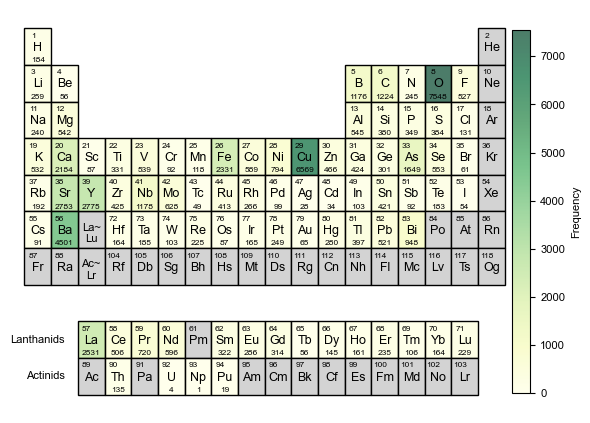

In [1]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import Normalize, LinearSegmentedColormap
import pandas as pd
import re
from mendeleev import get_all_elements
import numpy as np
import csv

# 化学式拆分为字典
def parse_formula(formula):
    formula = str(formula)  # 确保formula是字符串
    elements_ratios = {}
    for element, ratio in re.findall(r'([A-Z][a-z]*)(\d*\.?\d*)', formula):
        if element in elements_ratios:
            elements_ratios[element] += float(ratio) if ratio else 1
        else:
            elements_ratios[element] = float(ratio) if ratio else 1
    return elements_ratios

# 数据预处理：统计元素频数
def preprocess_molecular_data(data, Tc_line=5):
    element_counts = {}
    for index, row in data.iterrows():  # 使用iterrows()遍历DataFrame
        if row['Tc'] > Tc_line:  # 直接使用行数据访问Tc
            for element in parse_formula(row['formula']):
                element_counts[element] = element_counts.get(element, 0) + 1
    return element_counts         

# 绘制单个元素
def plot_element(ax, x, y, symbol, atomic_num, frequency, color_map, normalize):
    symb_fs = 9; # 元素符号大小
    num_fs = 6 # 元素序号大小
    Fre_fs = 6 # 频率次数大小
    color = color_map(normalize(frequency)) if frequency else 'lightgrey'
    ax.add_patch(plt.Rectangle((x - 0.5, y - 0.5), 1, 1, facecolor=color, edgecolor='black'))#设置边框
    ax.text(x, y + 0.03, symbol, fontsize=symb_fs, ha='center', va='center', color='black')
    ax.text(x - 0.18, y - 0.3, f'{atomic_num}', fontsize=num_fs, ha='center', va='center', color='black')

    if frequency:
        ax.text(x, y + 0.37, f'{frequency}', fontsize=Fre_fs, ha='center', va='center', color='black')
        
# 绘制周期表元素
def plot_elements(ax, elements, element_counts, lanthanoid, actinoid, color_map, normalize):
    for el in elements:
        if el.symbol in lanthanoid:
            x, y = 3 + lanthanoid.index(el.symbol), 9
        elif el.symbol in actinoid:
            x, y = 3 + actinoid.index(el.symbol), 10
        else:
            x, y = el.group_id, el.period
        plot_element(ax, x, y, el.symbol, el.atomic_number, element_counts.get(el.symbol, 0), color_map, normalize)

# 绘制镧系和锕系范围
def plot_lanthanoid_actinoid_labels(ax):
    """绘制镧系和锕系元素的范围"""
    # 镧系和锕系元素特殊处理
    ax.text(2, 9, "Lanthanids", fontsize=8, ha='right', va='center', color='black')
    ax.text(2, 10, "Actinids", fontsize=8, ha='right', va='center', color='black')
    bg_color = 'lightgrey'
    # # 镧系元素
    ax.text(3, 6+0.1, 'La~\nLu', fontsize=8, ha='center', va='center', color='black')
    # ax.text(3 - 0.05, 6 - 0.3, '57~71', fontsize=8, ha='center', va='center', color='black')
    ax.add_patch(plt.Rectangle((3 - 0.5, 6 - 0.5), 1, 1, facecolor=bg_color, edgecolor='black'))
    
    # # 锕系元素
    ax.text(3, 7+0.1, 'Ac~\nLr', fontsize=8, ha='center', va='center', color='black')
    # ax.text(3 - 0.05, 7 - 0.3, '89~103', fontsize=8, ha='center', va='center', color='black')
    ax.add_patch(plt.Rectangle((3 - 0.5, 7 - 0.5), 1, 1, facecolor=bg_color, edgecolor='black'))

# 主函数：绘制周期表
def main(Tc_line=5):
    # 读取数据并统计频数
    df = pd.read_csv(DATA_PATH, low_memory=False)
    element_counts = preprocess_molecular_data(df,Tc_line)

    lanthanoid = ['La', 'Ce', 'Pr', 'Nd', 'Pm', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu']
    actinoid = ['Ac', 'Th', 'Pa', 'U', 'Np', 'Pu', 'Am', 'Cm', 'Bk', 'Cf', 'Es', 'Fm', 'Md', 'No', 'Lr']

    max_freq = max(element_counts.values(), default=1)
    normalize = Normalize(vmin=0, vmax=max_freq)

    # 初始化绘图
    fig_height = 11  # cm
    fig_width = 16  # cm
    plt.rcParams['font.family'] = 'Arial'  # 例如，设置为 Arial 字体
    fig, ax = plt.subplots(figsize=(fig_width / 2.54, fig_height / 2.54))
    # 绘制元素和镧系/锕系标签
    plot_lanthanoid_actinoid_labels(ax)
    plot_elements(ax, elements, element_counts, lanthanoid, actinoid, color_map, normalize)
    # 图表设置
    ax.set_xlim(0, 19)
    ax.set_ylim(0, 11)
    ax.invert_yaxis()
    ax.set_xticks([])
    ax.set_yticks([])
    ax.grid(False)
    ax.axis('off')  # 隐藏整个坐标轴框架
    
    # 添加颜色条
    cbar = fig.colorbar(cm.ScalarMappable(norm=normalize, cmap=color_map), ax=ax, orientation='vertical',pad=-0.01,shrink=0.9)
    cbar.set_label('Frequency', fontsize=8)

    cbar.ax.tick_params(labelsize=8)  # 设置刻度标签的字体大小
    # 调整布局
    plt.tight_layout()
    # 显示图表
#     plt.savefig('./Pic/Fig2c_a4.svg', bbox_inches='tight',transparent=True)
#     plt.savefig('./Pic/Fig2c_a4.tif', dpi=600, bbox_inches='tight',transparent=True)
    plt.show()


# 运行主函数
if __name__ == "__main__":
    # 数据路径
    DATA_PATH = '../Data/mdr_clean.csv'
    # 获取周期表元素
    elements = get_all_elements()
    # 调节color_map的RGB values
    original_cmap = cm.YlGn  # 预定义
    colors = original_cmap(np.linspace(0, 1, original_cmap.N))  # 获取颜色
    colors[:, -1] = colors[:, -1] * 0.7  # -1是透明度。前面的行都是RGB色值
    color_map = LinearSegmentedColormap.from_list("lighter_YlOrBr", colors)
    main(Tc_line=5)

### Fig4(b) 数据量收敛性测试

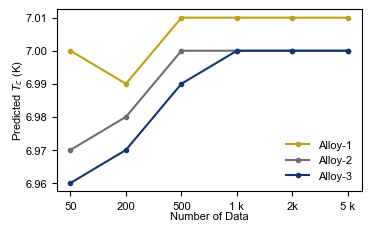

In [3]:
import matplotlib.pyplot as plt

data_num = ['5 k', '2k', '1 k', '500', '200', '50']
alloys_data = {
    'Alloy-1': [
        'In0.500Sn0.500', 'In0.487Sn0.494Zn0.019', 'In0.500Sn0.500', 
        'In0.500Sn0.500', 'In0.500Sn0.500', 'In0.500Sn0.500', 'In0.506Sn0.494', 
        'In0.502Sn0.498'
    ],
    'Alloy-2': [
        'Ga0.002In0.596Sn0.402', 'In0.500Sn0.500', 'In0.501Sn0.499', 
        'In0.501Sn0.499', 'In0.501Sn0.499', 'In0.502Sn0.498', 'In0.498Sn0.502', 
        'In0.508Sn0.492'
    ],
    'Alloy-3': [
        'Bi0.005In0.592Sn0.403', 'In0.499Sn0.497Ag0.004', 'In0.486Sn0.494Zn0.020', 
        'In0.502Sn0.498', 'In0.502Sn0.498', 'In0.499Sn0.501', 'In0.496Sn0.504', 
        'In0.490Sn0.502Zn0.008'
    ],
}
tc_values = {
    'Alloy-1': [7.01, 7.01, 7.01, 7.01, 6.99, 7.00],
    'Alloy-2': [7.00, 7.00, 7.00, 7.00, 6.98, 6.97],
    'Alloy-3': [7.00, 7.00, 7.00, 6.99, 6.97, 6.96]
}
# 指定颜色
colors = [ '#BBA315','#6C6E72','#143670']

# 创建折线图
fig_height = 6 #cm
fig_width = 10 #cm
# 初始化绘图
plt.rcParams['font.family'] = 'Arial'  # 例如，设置为 Arial 字体
plt.figure(figsize=(fig_width/2.54, fig_height/2.54))

# 反转数据顺序
data_num_reversed = data_num[::-1]
tc_values_reversed = {alloy: tc_values[alloy][::-1] for alloy in tc_values}

# 绘制每条折线图，并指定颜色
for alloy, color in zip(alloys_data.keys(), colors):
    plt.plot(data_num_reversed, tc_values_reversed[alloy], label=alloy, marker='o', color=color,markersize=3)

# 添加标题和标签
plt.xlabel('Number of Data', color='black', fontsize=8, labelpad=0)
plt.ylabel('Predicted $\mathit{T}_{\mathit{c}}$ (K)', color='black', fontsize=8, labelpad=0)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

# 添加图例
plt.legend(fontsize=8, framealpha=0)
# 显示图表
plt.savefig('./Pic/Fig4b_a4.svg', bbox_inches='tight', transparent=True)
plt.savefig('./Pic/Fig4b_a4.tif', dpi=600, bbox_inches='tight', transparent=True)
plt.show()

### Fig4(c)ii、(d)ii:二元合金预测数据

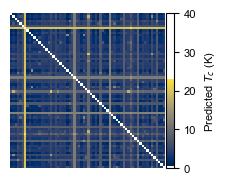

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from collections import defaultdict
from matplotlib import cm
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.ticker import MaxNLocator

DATA_PATH = '../Code/4_alloy_predict/2Alloy_et.csv'
# 从CSV文件中读取数据
df = pd.read_csv(DATA_PATH, low_memory=False)

# 提取所有元素名称作为x轴和y轴标签
x_labels = []
y_labels = []
for _, row in df.iterrows():
    x, y = row['elements'].split('-')
    x_labels.append(x)
    y_labels.append(y)

# 存储Tc值
tc_values = defaultdict(lambda: defaultdict(float))
for i, (x, y) in enumerate(zip(x_labels, y_labels)):
    tc_values[x][y] = round(df.loc[i, 'Predicted_Tc'], 2)  # 保留两位小数
    tc_values[y][x] = round(df.loc[i, 'Predicted_Tc'], 2)  # 保留两位小数

# 将字典转换为numpy数组，用于绘图
element_unique = sorted(list(tc_values.keys()))
n_ele = len(element_unique)

# 创建一个空的矩阵，用于存储Tc值
matrix = np.full((n_ele, n_ele), np.nan)

# 填充矩阵的非对角线位置
for i, x in enumerate(element_unique):
    for j, y in enumerate(element_unique):
        if i!=j:
            matrix[i, j] = tc_values[x][y]


# 创建热力图
fig_height = 6 #cm
fig_width = 6 #cm
# 初始化绘图
plt.rcParams['font.family'] = 'Arial'  # 例如，设置为 Arial 字体
plt.figure(figsize=(fig_width/2.54, fig_height/2.54))
heatmap = plt.imshow(matrix, cmap='cividis', interpolation='none')

f_size = 8
# 添加颜色条
cbar = plt.colorbar(heatmap,orientation='vertical',pad=0.01,shrink=0.75)  # 调整颜色条距离
cbar.set_ticks(np.arange(0, 41, 10))
cbar.set_label('Predicted $\mathit{T}_{\mathit{c}}$ (K)', fontsize=f_size)
cbar.ax.tick_params(labelsize=f_size)  # 设置刻度标签的字体大小

# # 设置图表标题和坐标轴标签
# plt.xlabel('Elements', fontsize=f_size)
# plt.ylabel('Elements', fontsize=f_size)

# # 设置横纵坐标刻度
# plt.xticks(range(n_ele), element_unique, rotation=89, fontsize=12)
# plt.yticks(range(n_ele), element_unique, fontsize=12)
plt.axis('off')


# 调整图表边距
plt.tight_layout()

# 显示图表
# plt.savefig('./Pic/Fig4c_2_a4.svg', bbox_inches='tight',transparent=True)
# plt.savefig('./Pic/Fig4c_2_a4.tif', dpi=600, bbox_inches='tight',transparent=True)
plt.show()

### Fig4(c)iii、(d)iii:二元合金预测数据

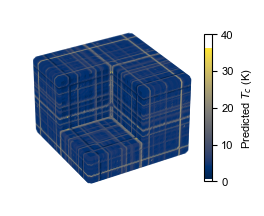

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from collections import defaultdict
import matplotlib.cm as cm

# 读取CSV文件
DATA_PATH = '../Code/4_alloy_predict/3Alloy_rf.csv'
df = pd.read_csv(DATA_PATH, low_memory=False)

# 提取所有元素名称
e1_labels = []
e2_labels = []
e3_labels = []
for _, row in df.iterrows():
    e1, e2, e3 = row['elements'].split('-')
    e1_labels.append(e1)
    e2_labels.append(e2)
    e3_labels.append(e3)

# 存储Tc值
tc_values = defaultdict(lambda: defaultdict(lambda: defaultdict(float)))
for i, (e1, e2, e3) in enumerate(zip(e1_labels, e2_labels, e3_labels)):
    tc_value = round(df.loc[i, 'Predicted_Tc'], 2)
    tc_values[e1][e2][e3] = tc_value
    tc_values[e1][e3][e2] = tc_value
    tc_values[e2][e1][e3] = tc_value
    tc_values[e2][e3][e1] = tc_value
    tc_values[e3][e1][e2] = tc_value
    tc_values[e3][e2][e1] = tc_value

# 去重并排序元素名称
unique_elements = sorted(set(e1_labels + e2_labels + e3_labels))
element_to_index = {e: i for i, e in enumerate(unique_elements)}
n_ele = len(unique_elements)

# 构建坐标
x, y, z, tc_vals = [], [], [], []
for e1, nested1 in tc_values.items():
    for e2, nested2 in nested1.items():
        for e3, tc in nested2.items():
            if e1 in element_to_index and e2 in element_to_index and e3 in element_to_index:
                # 将元素映射到坐标轴 (0-65)
                x.append(element_to_index[e1])
                y.append(element_to_index[e2])
                z.append(element_to_index[e3])
                tc_vals.append(tc)

x = np.array(x)
y = np.array(y)
z = np.array(z)
tc_vals = np.array(tc_vals)

mask = (x <= 30) | (y <= 30) | (z <= 20)
x_masked = x[mask]
y_masked = y[mask]
z_masked = z[mask]
tc_vals_masked = tc_vals[mask]

# 创建3D散点图
fig_height = 7 #cm
fig_width = 7 #cm
# 初始化绘图
plt.rcParams['font.family'] = 'Arial'  # 例如，设置为 Arial 字体
fig = plt.figure(figsize=(fig_width/2.54, fig_height/2.54))
ax = fig.add_subplot(111, projection='3d')
# original_cmap = cm.turbo  # 预定义
# colors = original_cmap(np.linspace(0, 1, original_cmap.N))  # 获取颜色
# colors[:, -1] = colors[:, -1] * 0.95  # -1是透明度。前面的行都是RGB色值
# colors[:, :3] *= 0.9 # 降低亮度
# color_map = LinearSegmentedColormap.from_list("user", colors)
# color_map.set_bad(color='none')  # 设置 nan 值为透明
# 绘制剖切后的散点图
sc = ax.scatter(x_masked, y_masked, z_masked, c=tc_vals_masked, cmap='cividis', s=5)

# 添加颜色条
f_size = 8
cbar = plt.colorbar(sc, orientation='vertical', pad=-0.01, shrink=0.6)
cbar.set_ticks(np.arange(0, 41, 10))
cbar.set_label('Predicted $\mathit{T}_{\mathit{c}}$ (K)', fontsize=f_size)
cbar.ax.tick_params(labelsize=f_size)  # 设置刻度标签的字体大小

# 设置视角和标签
ax.view_init(elev=30, azim=60)  # 旋转角度
# ax.set_xticks(range(n_ele))
# ax.set_xticklabels(unique_elements, fontsize=12)
# ax.set_yticks(range(n_ele))
# ax.set_yticklabels(unique_elements, fontsize=12)
# ax.set_zticks(range(n_ele))
# ax.set_zticklabels(unique_elements, fontsize=12)
# ax.set_xlabel('Element 1')
# ax.set_ylabel('Element 2')
# ax.set_zlabel('Element 3',rotation=90)
plt.axis('off')
# 调整图表边距
plt.tight_layout()
# plt.savefig('./Pic/Fig4d_3_a4.svg', bbox_inches='tight',transparent=True)
# plt.savefig('./Pic/Fig4d_3_a4.tif', dpi=600, bbox_inches='tight',transparent=True)
plt.show()


### Fig5(a)(b) 数据预测准确度与残差

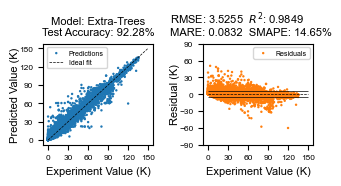

In [22]:
# 描述数据预测准确度与残差
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

def right_count(y_pred, y_true):
    relative_error = abs(y_pred - y_true)
    return (relative_error < 5).sum().item()

def mare_c(y_true, y_pred):
    # 只选择真实值>10 的样本
    mask = (y_true > 5)
    y_true_nonzero = y_true[mask]
    y_pred_nonzero = y_pred[mask]
    
    if len(y_true_nonzero) == 0:
        return float('nan')  # 如果没有非零样本，返回 NaN 避免错误
    
    return np.mean(np.abs((y_true_nonzero - y_pred_nonzero) / y_true_nonzero))

def smape_c(y_true, y_pred):
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2
    diff = np.abs(y_true - y_pred)
    return np.mean(diff / denominator) * 100  # 返回百分比形式

# 绘制散点图
def performancecalculator(trueVals, predVals, name):
    fig_height = 5  #cm
    fig_width = 8.5 #cm
    plt.rcParams['font.family'] = 'Arial'  # 例如，设置为 Arial 字体
    plt.figure(figsize=(fig_width/2.54, fig_height/2.54))
    # mt = max(trueVals)
    # mp = max(predVals)
    mt = 150
    mp = 150
    plt.subplot(1, 2, 1)
    plt.scatter(trueVals, predVals, color='#1f77b4', label='Predictions',s=3,marker='o',edgecolor='none')
    plt.plot([0, mt], [0, mp], 'k--', lw=0.5, label='Ideal fit')
    accuracy = right_count(predVals, trueVals) / len(predVals) * 100
    plt.title(
        f'Model: {name}\n'
        f'Test Accuracy: {accuracy:.2f}%',
        fontsize=8)
    plt.legend(fontsize=5)
    plt.xlabel('Experiment Value (K)',fontsize=8)
    plt.ylabel('Predicted Value (K)',fontsize=8,labelpad=-0.5)
    plt.xticks(fontsize=6)  # 确保所有的x轴标签都能显示
    plt.yticks(fontsize=6)  # 设置y轴标签的字体大小
    plt.xticks(range(0, mt+1, 30))
    plt.yticks(range(0, mt+1, 30))


    plt.subplot(1, 2, 2)
    residuals = predVals - trueVals 
    mare = mare_c(trueVals, predVals)
    smape = smape_c(trueVals, predVals)
    rmse = mean_squared_error(trueVals, predVals, squared=False)
    r2 = r2_score(trueVals, predVals)
    plt.title(
        f'RMSE: {rmse:.4f}  $R^2$: {r2:.4f}\n'
        f'MARE: {mare:.4f}  SMAPE: {smape:.2f}%', 
        fontsize=8, loc='left', x = -3e-1)
    plt.scatter(trueVals, residuals, color='#ff7f0e', label='Residuals',s=3,marker='o',edgecolor='none')
    plt.hlines(y=0, xmin=0, xmax=mt, colors='black', linestyles='dashed',lw=0.5)
    plt.hlines(y=5, xmin=0, xmax=mt, colors='black', linestyles='solid',lw=0.5)
    plt.hlines(y=-5, xmin=0, xmax=mt, colors='black', linestyles='solid',lw=0.5)
    plt.xlabel('Experiment Value (K)',fontsize=8)
    plt.ylabel('Residual (K)',fontsize=8,labelpad=-0.5)
    plt.xticks(fontsize=6)  # 确保所有的x轴标签都能显示
    plt.yticks(fontsize=6)  # 设置y轴标签的字体大小
    plt.xticks(range(0, mt+1, 30))
    plt.yticks(range(-90, 91, 30))
    plt.legend(fontsize=5)
    # 调整布局
    plt.tight_layout()
    plt.savefig(f'./Pic/Fig5-{name}.svg', bbox_inches='tight', pad_inches=0.05,transparent=True)
    plt.savefig(f'./Pic/Fig5-{name}.tif', dpi=600, bbox_inches='tight', pad_inches=0.05,transparent=True)
    plt.show()
    
# file_path = '../Code/1_Tree_model_train/3-prediction/updated_mdr_RF.csv'
# name = 'Random Forest'
file_path = '../Code/1_Tree_model_train/3-prediction/updated_mdr_ET.csv'
name = 'Extra-Trees'
    
data = pd.read_csv(file_path)   
performancecalculator(data['Tc'], data['Predicted'], name)

### Fig5(d):预测结果与实验结果对比

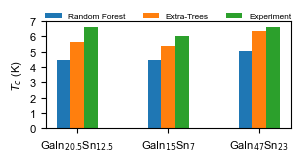

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 数据
data = {
    'LM-based material': ['GaIn$_{20.5}$Sn$_{12.5}$', 'GaIn$_{15}$Sn$_7$', 'GaIn$_{47}$Sn$_{23}$'],
    'RF-Tc (K)': [4.44, 4.48, 5.07],
    'ET-Tc (K)': [5.66, 5.39, 6.37],
    'Tc (K)': [6.6, 6.0, 6.6]
}

# 创建DataFrame
df = pd.DataFrame(data)

# 设置条形图的位置和宽度
n = len(df)
bar_width = 0.15
index = np.arange(n)

# 绘制条形图
fig_height = 4.5  #cm
fig_width = 8 #cm
plt.rcParams['font.family'] = 'Arial'  # 例如，设置为 Arial 字体
fig, ax = plt.subplots(figsize=(fig_width/2.54, fig_height/2.54))

# 绘制每个条形
bar1 = ax.bar(index, df['RF-Tc (K)'], bar_width, label='Random Forest')
bar2 = ax.bar(index + bar_width, df['ET-Tc (K)'], bar_width, label='Extra-Trees')
bar3 = ax.bar(index + 2 * bar_width, df['Tc (K)'], bar_width, label='Experiment')

# 设置x轴标签
ax.set_xticks(index + bar_width)
ax.set_xticklabels(df['LM-based material'], rotation=0, ha='center',fontsize=8)

# 设置y轴标签
ax.set_ylabel('$\mathit{T}_{\mathit{c}}$(K)', fontsize=8)
ax.set_ylim(0, 7)  # 设置y轴范围为0到7
plt.yticks(np.arange(0, 8, 1), fontsize=8)  # 设置y轴刻度为0到7

# 添加图例并移动位置
# ax.legend(loc='upper right', bbox_to_anchor=(0.548, 1.02),fontsize=6,framealpha=0)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), fontsize=6, framealpha=0, ncol=3)

# 显示图表
plt.tight_layout()
# 保存图表
plt.savefig('./Pic/Fig5d_a4.svg',  bbox_inches='tight', transparent=True)
plt.savefig('./Pic/Fig5d_a4.tif', dpi=600, bbox_inches='tight', transparent=True)
plt.show()

### Fig7(a)：不同数据集预测对比

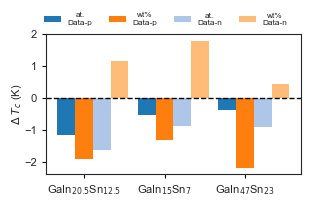

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 设置绘图风格
sns.set_style("white")
plt.rcParams.update({
    'font.size': 8,
    'axes.titlesize': 8,
    'axes.labelsize': 8,
    'xtick.labelsize': 8,
    'ytick.labelsize': 8,
    'legend.fontsize': 6,
    'font.family': 'Arial'
})

# 数据
data = {
    'formula': ['Ga0.772In0.143Sn0.085', 'Ga0.855In0.100Sn0.045', 'Ga0.416In0.396Sn0.187'],
    'alloy%': ['GaIn$_{20.5}$Sn$_{12.5}$', 'GaIn$_{15}$Sn$_7$', 'GaIn$_{47}$Sn$_{23}$'],
    'Tc': [6.6, 6, 6.6],
    'ET_element': [5.4375, 5.4557, 6.1999],
    'ET_alloy%': [4.6849, 4.6920, 4.4079],
    'ET_element_wt': [4.9588, 5.1160, 5.6945],
    'ET_alloy%_wt': [7.7406, 7.7715, 7.0238]
}

df = pd.DataFrame(data)

# 计算与 Tc 的偏差
methods = ['ET_element', 'ET_alloy%', 'ET_element_wt', 'ET_alloy%_wt']
for method in methods:
    df[f'dev_{method}'] = df[method] - df['Tc']

# 准备数据
dev_columns = [f'dev_{m}' for m in methods]
labels = ['at.\nData-p', 'wt%\nData-p', 'at.\nData-n', 'wt%\nData-n']
colors = ['#1f77b4', '#ff7f0e', '#aec7e8', '#ffbb78']
bar_width = 0.22
index = range(len(df))

# 创建画布
fig_height = 5.5  # cm
fig_width = 8    # cm
fig, ax = plt.subplots(figsize=(fig_width / 2.54, fig_height / 2.54))

# 绘制每个方法的偏差柱状图
for i, dev_col in enumerate(dev_columns):
    bar_positions = [x + i * bar_width for x in index]
    ax.bar(bar_positions, df[dev_col], width=bar_width, color=colors[i],
           edgecolor='none',label=labels[i])

# 绘制零基线（Tc）
ax.axhline(0, color='black', linewidth=1, linestyle='--')

# 标签与标题
ax.set_ylabel('$\Delta$ $\\mathit{T}_\\mathit{c}$ (K)',labelpad=0)
ax.set_xticks([r + bar_width for r in index])
ax.set_xticklabels(df['alloy%'], rotation=0, ha='center')
ax.set_yticks(np.arange(-2, 3, 1))
ax.tick_params(axis='y', which='major', length=3, color='black',direction='out',left=True)
ax.tick_params(axis='x', which='major', length=3, color='black',direction='out',bottom=True)
# 图例
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
legend = ax.legend(by_label.values(), by_label.keys(), loc='upper center',
          bbox_to_anchor=(0.47, 1.2), ncol=4, frameon=False, fontsize=6)
for txt in legend.get_texts():
    txt.set_ha('center')  # 水平居中
    txt.set_va('bottom')  # 垂直靠上
    
# 美化布局
plt.tight_layout()
plt.savefig('./Pic/Fig7a_a4.svg',  bbox_inches='tight', transparent=True)
plt.savefig('./Pic/Fig7a_a4.tif', dpi=600, bbox_inches='tight', transparent=True)
plt.show()

### Fig7(b)：不同过采样对比

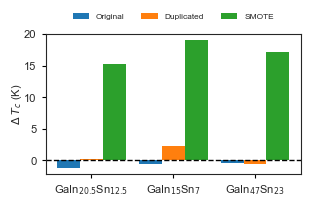

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 设置绘图风格
sns.set_style("white")
plt.rcParams.update({
    'font.size': 8,
    'axes.titlesize': 8,
    'axes.labelsize': 8,
    'xtick.labelsize': 8,
    'ytick.labelsize': 8,
    'legend.fontsize': 6,
    'font.family': 'Arial'
})

# 数据
data = {
    'formula': ['Ga0.772In0.143Sn0.085', 'Ga0.855In0.100Sn0.045', 'Ga0.416In0.396Sn0.187'],
    'alloy%': ['GaIn$_{20.5}$Sn$_{12.5}$', 'GaIn$_{15}$Sn$_7$', 'GaIn$_{47}$Sn$_{23}$'],
    'Tc': [6.6, 6, 6.6],
    'ET_element': [5.4375, 5.4557, 6.1999],
    'ET_element_os': [6.8664,8.2514,6.0858],
    'ET_element_od': [21.8546,25.0627,23.7313]
}

df = pd.DataFrame(data)

# 计算与 Tc 的偏差
methods = ['ET_element', 'ET_element_os', 'ET_element_od']
for method in methods:
    df[f'dev_{method}'] = df[method] - df['Tc']

# 准备数据
dev_columns = [f'dev_{m}' for m in methods]
labels = ['Original', 'Duplicated', 'SMOTE']
bar_width = 0.28
index = range(len(df))

# 创建画布
fig_height = 5.5  # cm
fig_width = 8    # cm
fig, ax = plt.subplots(figsize=(fig_width / 2.54, fig_height / 2.54))

# 绘制每个方法的偏差柱状图
for i, dev_col in enumerate(dev_columns):
    bar_positions = [x + i * bar_width for x in index]
    ax.bar(bar_positions, df[dev_col], width=bar_width,
           edgecolor='none',label=labels[i])

# 绘制零基线（Tc）
ax.axhline(0, color='black', linewidth=1, linestyle='--')

# 标签与标题
ax.set_ylabel('$\Delta$ $\\mathit{T}_\\mathit{c}$ (K)',labelpad=0)
ax.set_xticks([r + bar_width for r in index])
ax.set_xticklabels(df['alloy%'], rotation=0, ha='center')
ax.tick_params(axis='y', which='major', length=3, color='black',direction='out',left=True)
ax.tick_params(axis='x', which='major', length=3, color='black',direction='out',bottom=True)

# 图例
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
legend = ax.legend(by_label.values(), by_label.keys(), loc='upper center',
          bbox_to_anchor=(0.5, 1.2), ncol=3, frameon=False, fontsize=6)
    
# 美化布局
plt.tight_layout()
plt.savefig('./Pic/Fig7b_a4.svg',  bbox_inches='tight', transparent=True)
plt.savefig('./Pic/Fig7b_a4.tif', dpi=600, bbox_inches='tight', transparent=True)
plt.show()

### Fig7(c)：高温超导预测能力

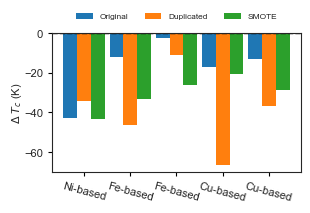

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 设置绘图风格
sns.set_style("white")
plt.rcParams.update({
    'font.size': 8,
    'axes.titlesize': 8,
    'axes.labelsize': 8,
    'xtick.labelsize': 8,
    'ytick.labelsize': 8,
    'legend.fontsize': 6,
    'font.family': 'Arial'
})

# 数据
data = {
    'formula': ['La2.85Pr0.15Ni2O7', 'Sm0.95La0.05O0.85F0.15Fe1As1', 'Li0.9N0.5H1.5Fe2Se2', 'Sr2Cu1O3.3', 'Y1Sr2Cu2.75Mo0.25O7.54'],
    'alloy%': ['LaPr$_{5.26}$Ni$_{6.99}$O$_{24.55}$', 'Sm$_{95}$La$_{5}$O$_{85}$F$_{15}$Fe$_{100}$As$_{100}$', 'Li$_{60}$N$_{33.3}$H$_{100}$Fe$_{133}$Se$_{133}$', 'Sr$_{66.7}$Cu$_{33.3}$O$_{100}$', 'Y$_{33.3}$Sr$_{66.7}$Cu$_{92}$Mo$_{8.7}$O$_{251}$'],
    'Tc': [45, 57.3, 44, 95, 84],
    'ET_element': [2.023323333, 45.10094444, 41.6175787, 77.88297222, 70.88338889],
    'ET_element_os': [10.59883333, 10.76864141, 33.02027778, 28.3875, 47.09933333],
    'ET_element_od': [1.507652778, 23.85652611, 17.60869093, 74.24161111, 55.46295278]
    
}

df = pd.DataFrame(data)

# 计算与 Tc 的偏差
methods = ['ET_element', 'ET_element_os', 'ET_element_od']
for method in methods:
    df[f'dev_{method}'] = df[method] - df['Tc']

# 准备数据
dev_columns = [f'dev_{m}' for m in methods]
labels = ['Original', 'Duplicated', 'SMOTE']
bar_width = 0.3
index = range(len(df))

# 创建画布
fig_height = 5.7  # cm
fig_width = 8    # cm
fig, ax = plt.subplots(figsize=(fig_width / 2.54, fig_height / 2.54))

# 绘制每个方法的偏差柱状图
for i, dev_col in enumerate(dev_columns):
    bar_positions = [x + i * bar_width for x in index]
    ax.bar(bar_positions, df[dev_col], width=bar_width,
           edgecolor='none',label=labels[i])

# 绘制零基线（Tc）
ax.axhline(0, color='black', linewidth=1, linestyle='--')

# 标签与标题
ax.set_ylabel('$\Delta$ $\\mathit{T}_\\mathit{c}$ (K)',labelpad=0)
ax.set_xticks([r + bar_width for r in index])
ax.set_xticklabels(['Ni-based','Fe-based','Fe-based','Cu-based','Cu-based'], rotation=-15, ha='center')
ax.tick_params(axis='y', which='major', length=3, color='black',direction='out',left=True)
ax.tick_params(axis='x', which='major', length=3, color='black',direction='out',bottom=True)

# 图例
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
legend = ax.legend(by_label.values(), by_label.keys(), loc='upper center',
          bbox_to_anchor=(0.5, 1.2), ncol=3, frameon=False, fontsize=6)
    
# 美化布局
plt.tight_layout()
plt.savefig('./Pic/Fig7c_a4.svg',  bbox_inches='tight', transparent=True)
plt.savefig('./Pic/Fig7c_a4.tif', dpi=600, bbox_inches='tight', transparent=True)
plt.show()

### Fig7(d):非超导体预测能力

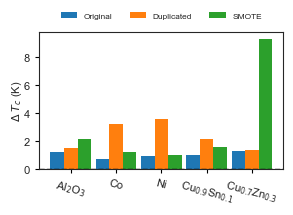

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 设置绘图风格
sns.set_style("white")
plt.rcParams.update({
    'font.size': 8,
    'axes.titlesize': 8,
    'axes.labelsize': 8,
    'xtick.labelsize': 8,
    'ytick.labelsize': 8,
    'legend.fontsize': 6,
    'font.family': 'Arial'
})

# 数据
data = {
    'formula': ['Al$_2$O$_3$', 'Co', 'Ni', 'Cu$_{0.9}$Sn$_{0.1}$', 'Cu$_{0.7}$Zn$_{0.3}$'],
    'Tc': [0, 0, 0, 0, 0],
    'ET_element': [1.183454192, 0.683332143, 0.917555833, 0.99501, 1.234167556],
    'ET_element_os': [1.446222222, 3.209563492, 3.564603175,   2.154444444, 1.349444444],
    'ET_element_od': [2.150907146,  1.153587302, 0.989859028,  1.530853333, 9.318015833]
}

df = pd.DataFrame(data)

# 计算与 Tc 的偏差
methods = ['ET_element', 'ET_element_os', 'ET_element_od']
for method in methods:
    df[f'dev_{method}'] = df[method] - df['Tc']

# 准备数据
dev_columns = [f'dev_{m}' for m in methods]
labels = ['Original', 'Duplicated', 'SMOTE']
bar_width = 0.3
index = range(len(df))

# 创建画布
fig_height = 4.5  # cm
fig_width = 8    # cm
fig, ax = plt.subplots(figsize=(fig_width / 2.54, fig_height / 2.54))

# 绘制每个方法的偏差柱状图
for i, dev_col in enumerate(dev_columns):
    bar_positions = [x + i * bar_width for x in index]
    ax.bar(bar_positions, df[dev_col], width=bar_width,
           edgecolor='none',label=labels[i])

# 绘制零基线（Tc）
ax.axhline(0, color='black', linewidth=1, linestyle='--')

# 标签与标题
ax.set_ylabel('$\Delta$ $\\mathit{T}_\\mathit{c}$ (K)',labelpad=0)
ax.set_xticks([r + bar_width for r in index])
ax.set_xticklabels(df['formula'], rotation=-15, ha='center')
ax.tick_params(axis='y', which='major', length=3, color='black',direction='out',left=True)
ax.tick_params(axis='x', which='major', length=3, color='black',direction='out',bottom=True)

        
# 图例
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
legend = ax.legend(by_label.values(), by_label.keys(), loc='upper center',
          bbox_to_anchor=(0.5, 1.2), ncol=3, frameon=False, fontsize=6)
    
# 美化布局
# plt.tight_layout()
plt.savefig('./Pic/Fig7d_a4.svg',  bbox_inches='tight', transparent=True)
plt.savefig('./Pic/Fig7d_a4.tif', dpi=600, bbox_inches='tight', transparent=True)
plt.show()